In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
terrorist_attack = pd.read_csv('/content/sample_data/terrorist-attacks new.csv')
(terrorist_attack)

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [ ]:
print(terrorist_attack.head())

        Entity Code  Year  Terrorist attacks
0  Afghanistan  AFG  1970                  0
1  Afghanistan  AFG  1971                  0
2  Afghanistan  AFG  1972                  0
3  Afghanistan  AFG  1973                  1
4  Afghanistan  AFG  1974                  0


In [ ]:
print(terrorist_attack.tail())

         Entity Code  Year  Terrorist attacks
10512  Zimbabwe  ZWE  2017                  3
10513  Zimbabwe  ZWE  2018                  2
10514  Zimbabwe  ZWE  2019                  2
10515  Zimbabwe  ZWE  2020                  1
10516  Zimbabwe  ZWE  2021                  0


In [ ]:
print(terrorist_attack.describe())

               Year  Terrorist attacks
count  10517.000000       10517.000000
mean    1996.226871          76.825711
std       15.089465         532.336065
min     1970.000000           0.000000
25%     1983.000000           0.000000
50%     1997.000000           0.000000
75%     2009.000000           6.000000
max     2021.000000       16820.000000


In [ ]:
print(terrorist_attack.shape)

(10517, 4)


In [ ]:
print(terrorist_attack.size)

42068


In [ ]:
print(terrorist_attack.dtypes)

Entity               object
Code                 object
Year                  int64
Terrorist attacks     int64
dtype: object


In [ ]:
print(terrorist_attack.nunique())

Entity               221
Code                 196
Year                  51
Terrorist attacks    663
dtype: int64


In [ ]:
# Check for missing values
print(terrorist_attack.isnull().sum())

Entity                  0
Code                 1254
Year                    0
Terrorist attacks       0
dtype: int64


In [ ]:
terrorist_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             10517 non-null  object
 1   Code               9263 non-null   object
 2   Year               10517 non-null  int64 
 3   Terrorist attacks  10517 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 328.8+ KB


In [ ]:
terrorist_attack.count()

Entity               10517
Code                  9263
Year                 10517
Terrorist attacks    10517
dtype: int64

In [ ]:
terrorist_attack.to_string()

"                               Entity      Code  Year  Terrorist attacks\n0                         Afghanistan       AFG  1970                  0\n1                         Afghanistan       AFG  1971                  0\n2                         Afghanistan       AFG  1972                  0\n3                         Afghanistan       AFG  1973                  1\n4                         Afghanistan       AFG  1974                  0\n5                         Afghanistan       AFG  1975                  0\n6                         Afghanistan       AFG  1976                  0\n7                         Afghanistan       AFG  1977                  0\n8                         Afghanistan       AFG  1978                  0\n9                         Afghanistan       AFG  1979                  3\n10                        Afghanistan       AFG  1980                  0\n11                        Afghanistan       AFG  1981                  0\n12                        Afghanistan

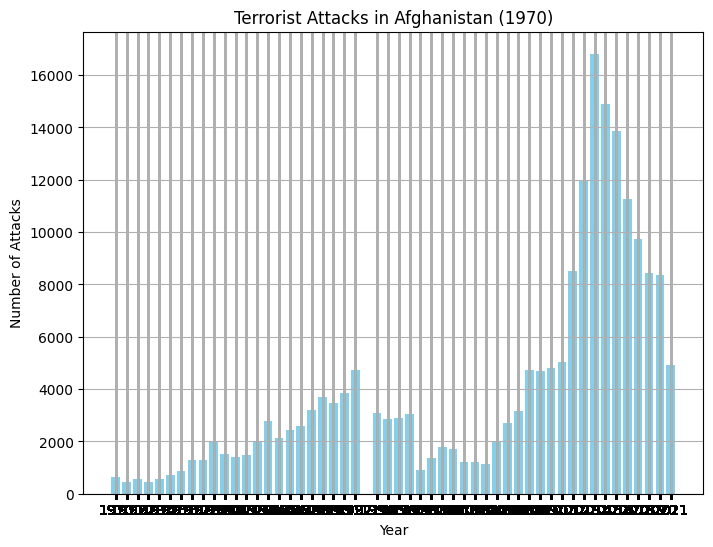

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(terrorist_attack['Year'], terrorist_attack['Terrorist attacks'], color='skyblue')
plt.title('Terrorist Attacks in Afghanistan (1970)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(terrorist_attack['Year'])
plt.grid(True)
plt.show()

In [ ]:
# Exclude the row with "World"
filtered_df = terrorist_attack[terrorist_attack['Entity'] != 'World']

# Grouping by country and summing the terrorist attacks
country_attacks = filtered_df.groupby('Entity')['Terrorist attacks'].sum()

# Finding the country with the highest number of terrorist attacks
highest_country = country_attacks.idxmax()

print("Country with the highest number of terrorist attacks:", highest_country)

Country with the highest number of terrorist attacks: Asia


In [ ]:
# Filter out rows where Entity is "World" or "Asia"
filtered_df = terrorist_attack[~terrorist_attack['Entity'].isin(['World', 'Asia','Middle East & North Africa','South Asia','Africa'])]

# Grouping by country and summing the terrorist attacks
country_attacks = filtered_df.groupby('Entity')['Terrorist attacks'].sum()

# Finding the country with the highest number of terrorist attacks
highest_country = country_attacks.idxmax()

print("Country with the highest number of terrorist attacks :", highest_country)

Country with the highest number of terrorist attacks : Iraq


In [ ]:
# Grouping by country and summing the terrorist attacks
country_attacks = filtered_df.groupby('Year')['Terrorist attacks'].sum()

# Finding the country with the highest number of terrorist attacks
highest_Year = country_attacks.idxmax()

print("Year with the highest number of terrorist attacks:", highest_Year)

Year with the highest number of terrorist attacks: 2014


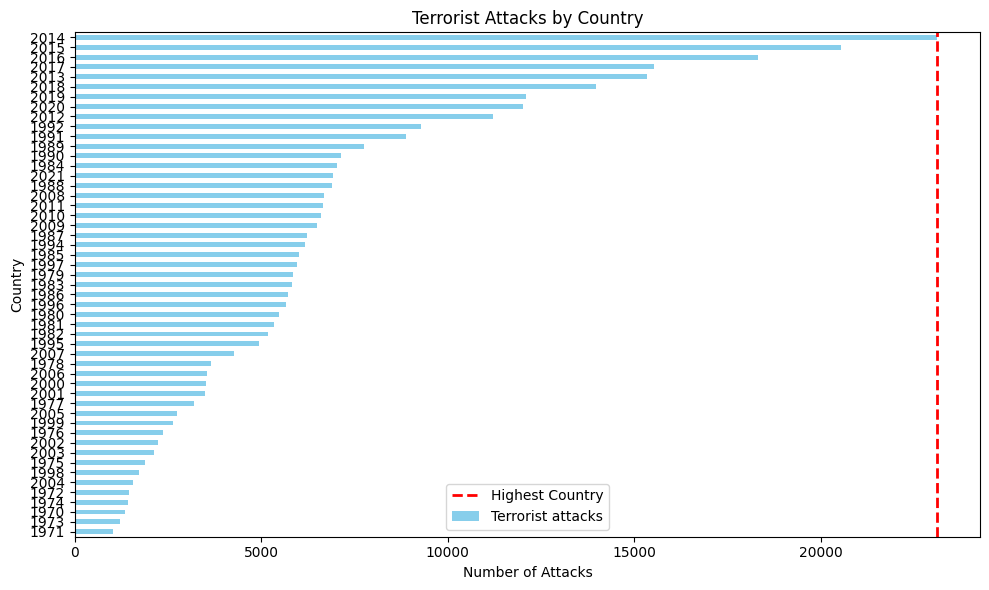

In [ ]:
# Plot 2: Horizontal Bar Plot
plt.figure(figsize=(10, 6))
country_attacks.sort_values().plot(kind='barh', color='skyblue')
plt.title('Terrorist Attacks by Country')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.axvline(country_attacks[highest_country], color='red', linestyle='--', linewidth=2, label='Highest Country')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-42-ea9d88cb12a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_attacks, palette="viridis")


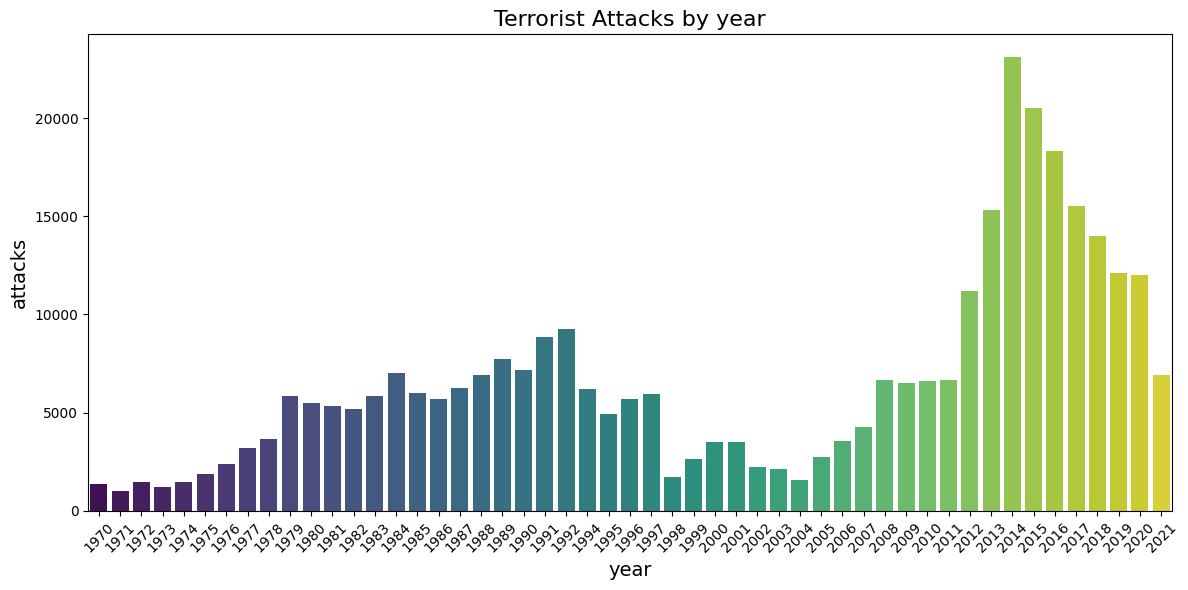

In [ ]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=country_attacks, palette="viridis")
plt.title('Terrorist Attacks by year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('attacks', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-14-5063c7ec737c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Terrorist attacks', y='Entity', data=attack_sorted_descending.head(200), orient='horizontal', palette='coolwarm')


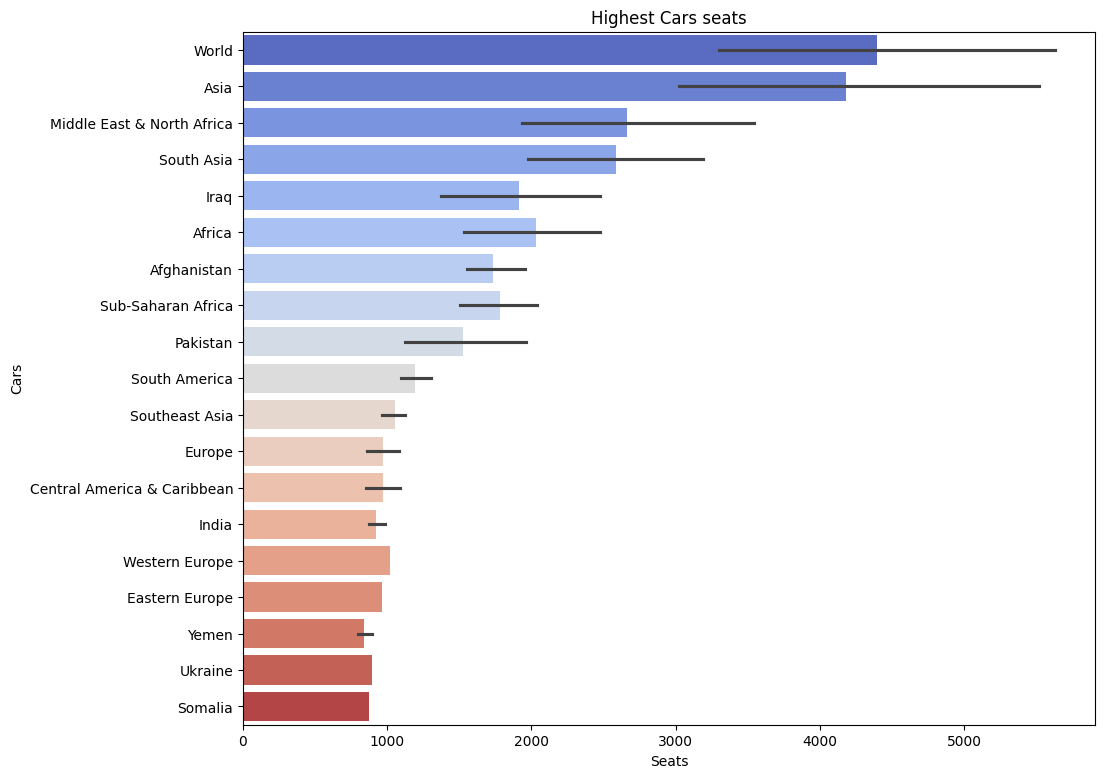

In [14]:
# Sorting the DataFrame in descending order based on the 'Seats' column
attack_sorted_descending = terrorist_attack.sort_values(by='Terrorist attacks', ascending=False)

# Plotting the sorted data
plt.figure(figsize=(11, 9))
sns.barplot(x='Terrorist attacks', y='Entity', data=attack_sorted_descending.head(200), orient='horizontal', palette='coolwarm')
plt.title('Highest attack')
plt.xlabel('attack')
plt.ylabel('place')
plt.show()

<ipython-input-16-1c3be7c1659e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Terrorist attacks', y='Year', data=top_20, orient='horizontal', palette='coolwarm')


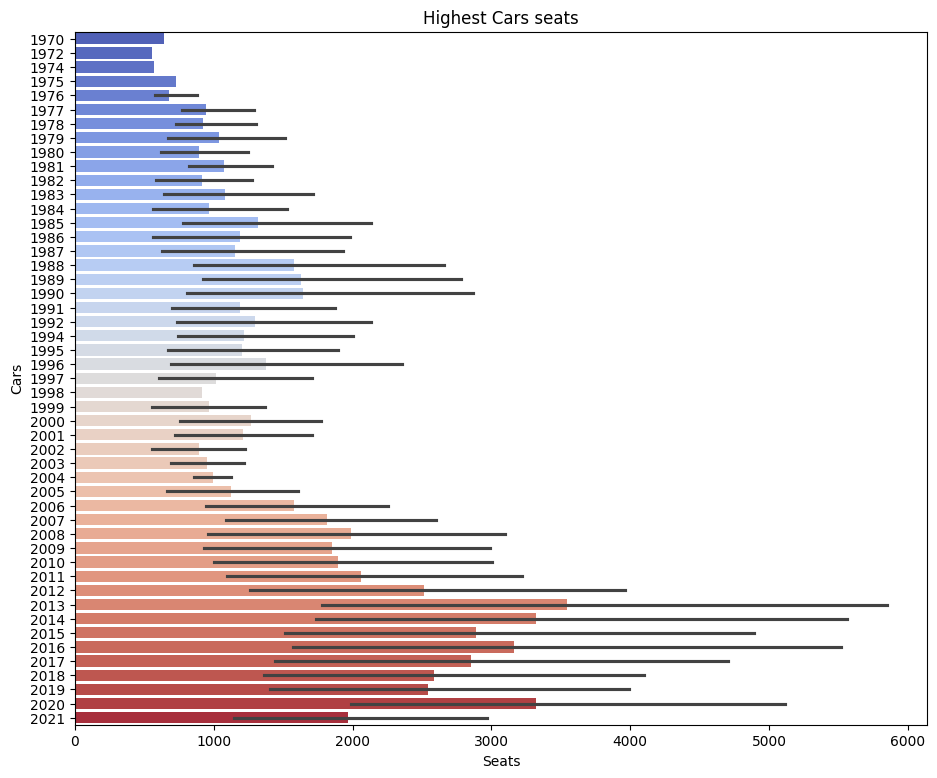

In [16]:
top_20 = terrorist_attack.sort_values(by='Terrorist attacks', ascending=False).head(300)

# Plotting the sorted data
plt.figure(figsize=(11, 9))
sns.barplot(x='Terrorist attacks', y='Year', data=top_20, orient='horizontal', palette='coolwarm')
plt.title('Highest Cars seats')
plt.xlabel('Seats')
plt.ylabel('Cars')
plt.show()